In [49]:
import pandas as pd
import numpy as np
import os
header = ['企业编码','排污口编码','污染物编码','记录时间','污染物浓度','污染物排放量']
pollution = pd.read_csv("all_data.csv", names=header, encoding='utf-8', low_memory=False)
pollution.info()
pollution.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   企业编码    1048576 non-null  int64  
 1   排污口编码   1048576 non-null  object 
 2   污染物编码   904156 non-null   object 
 3   记录时间    904156 non-null   object 
 4   污染物浓度   892674 non-null   float64
 5   污染物排放量  821382 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 48.0+ MB


,企业编码,排污口编码,污染物编码,记录时间,污染物浓度,污染物排放量
0,17280000089583,64000000000600100000,w00000,1/1/2020 00:00:00,66.25,870.0
1,17280000089583,64000000000600100000,w00000,2/1/2020 00:00:00,73.18,1758.0
2,17280000089583,64000000000600100000,w00000,3/1/2020 00:00:00,79.95,1918.0
3,17280000089583,64000000000600100000,w00000,4/1/2020 00:00:00,69.91,1678.0
4,17280000089583,64000000000600100000,w00000,5/1/2020 00:00:00,NaN,74.0


In [54]:
# 清洗数据，去除记录时间为空的数据
pollution = pollution.dropna(subset='记录时间')
# 清洗数据，去除带空值的行
pollution = pollution.dropna()

def cut_w(x):
    return x.replace('w','')

def format_time(x):
    return x.replace('/','').replace(":",'').replace(" ",'')

pollution['污染物编码'] = pollution['污染物编码'].copy().apply(cut_w)
pollution['记录时间'] = pollution['记录时间'].copy().apply(format_time)
pollution


,企业编码,排污口编码,污染物编码,记录时间,污染物浓度,污染物排放量
0,17280000089583,64000000000600100000,00000,112020000000,66.250,870.000
1,17280000089583,64000000000600100000,00000,212020000000,73.180,1758.000
2,17280000089583,64000000000600100000,00000,312020000000,79.950,1918.000
3,17280000089583,64000000000600100000,00000,412020000000,69.910,1678.000
8,17280000089583,64000000000600100000,00000,1132020000000,108.450,2584.000
...,...,...,...,...,...,...
904151,172951750800894000,876604669085005,21003,25112021000000,0.026,0.001
904152,172951750800894000,876604669085005,21003,26112021000000,0.023,0.003
904153,172951750800894000,876604669085005,21003,27112021000000,0.011,0.001
904154,172951750800894000,876604669085005,21003,28112021000000,0.034,0.001


In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2], 
                  random_state =9)
# plt.scatter(X[:, 0], X[:, 1], marker='o')
# plt.show()
X, y

(array([[-8.41028464e-01, -3.36118553e-01],
        [-1.78355178e-03,  3.07827932e-01],
        [ 8.28954868e-01,  1.00510410e+00],
        ...,
        [-1.63916905e-01, -2.22806370e-01],
        [ 2.29264700e+00,  2.01264954e+00],
        [-9.69725851e-01, -1.08219369e+00]]),
 array([0, 1, 2, 1, 0, 3, 1, 2, 0, 3, 2, 3, 3, 3, 1, 0, 1, 0, 2, 3, 0, 2,
        3, 0, 2, 2, 2, 3, 3, 2, 2, 0, 0, 2, 2, 2, 3, 1, 1, 0, 1, 3, 3, 1,
        1, 0, 1, 3, 1, 0, 0, 1, 1, 3, 1, 3, 0, 1, 0, 2, 2, 0, 1, 1, 3, 3,
        3, 3, 1, 3, 3, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1,
        3, 0, 1, 1, 3, 3, 3, 2, 3, 0, 2, 1, 1, 3, 2, 0, 2, 1, 2, 1, 3, 3,
        2, 0, 2, 3, 1, 0, 0, 2, 0, 2, 0, 2, 3, 1, 2, 2, 2, 0, 2, 1, 0, 0,
        0, 3, 3, 0, 2, 1, 2, 0, 1, 0, 0, 2, 3, 2, 1, 0, 0, 1, 1, 2, 1, 3,
        3, 2, 1, 2, 2, 1, 1, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 0, 0, 3, 3, 2,
        3, 1, 3, 0, 3, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3,
        0, 1, 0, 3, 1, 2, 1, 3, 2, 3, 3, 1, 3, 1, 0, 1,

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(pollution)
# 建立模型，K=3

pollution['cluster'] = km.labels_
pollution.sort_values('cluster')
pollution.head()

,企业编码,排污口编码,污染物编码,记录时间,污染物浓度,污染物排放量,cluster
0,17280000089583,64000000000600100000,00000,112020000000,66.25,870.0,0
1,17280000089583,64000000000600100000,00000,212020000000,73.18,1758.0,0
2,17280000089583,64000000000600100000,00000,312020000000,79.95,1918.0,0
3,17280000089583,64000000000600100000,00000,412020000000,69.91,1678.0,0
8,17280000089583,64000000000600100000,00000,1132020000000,108.45,2584.0,0


KeyError: '污染物编码'

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


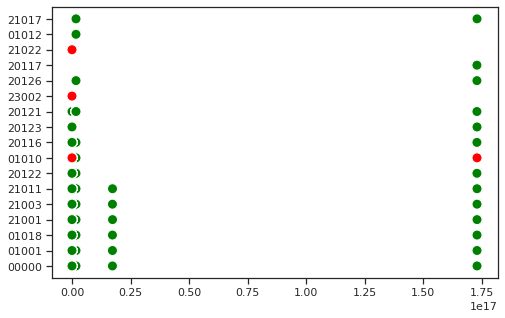

In [57]:
import seaborn as sns
centers = pollution.groupby('cluster').mean().reset_index()
colors = np.array(['red','green','blue','yellow'])

sns.set(font='SimHei',style='ticks')
plt.figure(figsize=(8,5))
plt.scatter(pollution['企业编码'],pollution['污染物编码'],c=colors[pollution['cluster']],edgecolor='w',s=100)
plt.scatter(centers['企业编码'],centers['污染物编码'],linewidths=5,marker='x',s=200, c='black')
plt.tick_params(labelsize = 13)
plt.title('K-Means')
plt.xlabel('企业编码')
plt.ylabel('污染物编码')
sns.despine()